In [3]:
# Insert the directory
import sys
import os

path_to_helper = os.path.join(".", "src", "helper")
print(path_to_helper)
sys.path.insert(0,path_to_helper)

.\src\helper


In [4]:
import helper

In [5]:
import pandas as pd
path_to_data = os.path.join(".","data", "breast_cancer","breast-cancer.csv")

df = pd.read_csv(path_to_data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Veryfying if the dataset is imbalanced

    Count of each class in the dataset:
      Class "B": 357
      Class "M": 212
    The total number of samples is 357 + 212 = 569.

  Now, let's calculate the proportion of each class:

    Proportion of class "B":
      357/569 ≈ 0.627
    Proportion of class "M":
      212 / 569 = 0.373

In this case, the class distribution is not perfectly balanced because the proportion of class "B" is approximately 0.627 while the proportion of class "M" is approximately 0.373. However, the dataset is not severely imbalanced either. Typically, a balanced dataset would have classes with roughly equal proportions, but slight imbalances are common and may not significantly affect model performance depending on the specific task and algorithms used. Hence, for this use case dataset will be treated as a balanced dataset.

## Justification of evaluation metric

In a medical classification problem like predicting whether a tumor will turn malignant, the choice of evaluation metric is critical as it directly impacts patient outcomes. Given the context, the most appropriate metric to use would be a combination of Sensitivity (Recall) and Specificity.

- Sensitivity (Recall): Sensitivity measures the proportion of true positive predictions among all actual positive instances, i.e., it tells us how well the classifier identifies malignant tumors out of all the tumors that are actually malignant. In this context, high sensitivity is crucial because missing a malignant tumor (false negative) could have severe consequences for the patient's health.

- Specificity: Specificity measures the proportion of true negative predictions among all actual negative instances, i.e., it tells us how well the classifier identifies benign tumors out of all the tumors that are actually benign. In this context, high specificity is also important because misclassifying a benign tumor as malignant (false positive) could lead to unnecessary stress, treatments, or surgeries for the patient.

Given the importance of both minimizing false negatives (missing malignant tumors) and false positives (misclassifying benign tumors), it's common to use metrics that balance sensitivity and specificity, such as the F1 Score. This metric considers both false positives and false negatives and provides a more comprehensive evaluation of the classifier's performance and ensures a balanced evaluation of the classifier's performance.

## Data Preprocessing

Data was preprocessed using standard scaling, and then divided into a testing and training set.

In [7]:
# Import necessary modules for data preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# X contains the features (all columns except the 'diagnosis' and the "id" column)
X = df.drop(["diagnosis","id"], axis=1)
# y contains the labels (only the 'diagnosis' column)
y = df["diagnosis"]

# Split the dataset into training and testing sets
# random_state=0 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize StandardScaler for feature scaling
scalar = StandardScaler()

# Fit the StandardScaler to the training data
scalar.fit(X_train)

# Transform the training and testing data using the fitted StandardScaler
# This scales each feature to have a mean of 0 and a standard deviation of 1
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

y_train = y_train.reset_index().drop("index", axis = 1).diagnosis.values
y_test = y_test.reset_index().drop("index", axis = 1).diagnosis.values

## Decision trees

- Hyperparameter-tuning
    - ccp alpha, max depth, criteria and max sample split were used for hyperparameter tuning by varying hyperparameters of interest keeping all other hyperparameters fixed to train the models and plot the curves for f1 accuracy on the training and test datasets.
    - Overfit and underfit analysis was done by interprating the graphs.
- Fine tuning the model using grid search
- Learning Curve plot and analysis
    - Variation of datasize to train models with data and plot the curves
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times

In [8]:
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter tuning

Pruning
 - Post pruning using cost complexity pruning
 - Prepruning by varying the max_depth parameter which varies the maximum depth of the tree

In [9]:
# Post pruning using cost complexity pruning

# Create an Decision Tree classifier with a radial basis function (RBF) kernel
clf = DecisionTreeClassifier(random_state = 0)
# Find the ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
# Define the hyperparameter names
param_names = ["ccp_alpha", 
               "max_depth", 
               "criterion", 
               "min_samples_split"]

# List of values to be explored for the hyperparameter
param_values = [ccp_alphas[:-1], # Excluding the trivial case of tree with no splits
                list(range(1, 9)), 
                ['gini', 'entropy', 'log_loss'],
                [0.02 * i for i in range(1, 11)]]

# Use a helper function 'train_clfs_with_hyperparameters' to train classifiers with different hyperparameter values
# DecisionTreeClassifier is the classifier being used
# 'param_name' is the name of the hyperparameter being tuned
# 'param_value' is the list of values to be explored for the hyperparameter
# 'X_train' is the training data
# 'y_train' is the corresponding labels

dct_clfs = [helper.train_clfs_with_hyperparameters(DecisionTreeClassifier, param_name, param_value, X_train, y_train) 
            for param_name, param_value in zip(param_names, param_values)]

### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

In [11]:
# Calculate training scores for classifiers trained with different hyperparameters
# 'dct_clfs' a list containing classifiers trained with different hyperparamters
# The score is calculated by the get_score method using the 'f1' criteria on the training data (X_train, y_train)

scoring = "f1"
train_scores_dct = [[helper.get_score(y_train,
                                     clf.predict(X_train), scoring, pos_label = 'M') 
                     for clf in dct_clf]
                    for dct_clf in dct_clfs]

# Calculate test scores for classifiers trained with different ccp_alpha values
# Similar to training scores calculation but using the testing data (X_test, y_test)
test_scores_dct = [[helper.get_score(y_test,
                                     clf.predict(X_test), scoring, pos_label = 'M') 
                     for clf in dct_clf]
                    for dct_clf in dct_clfs]

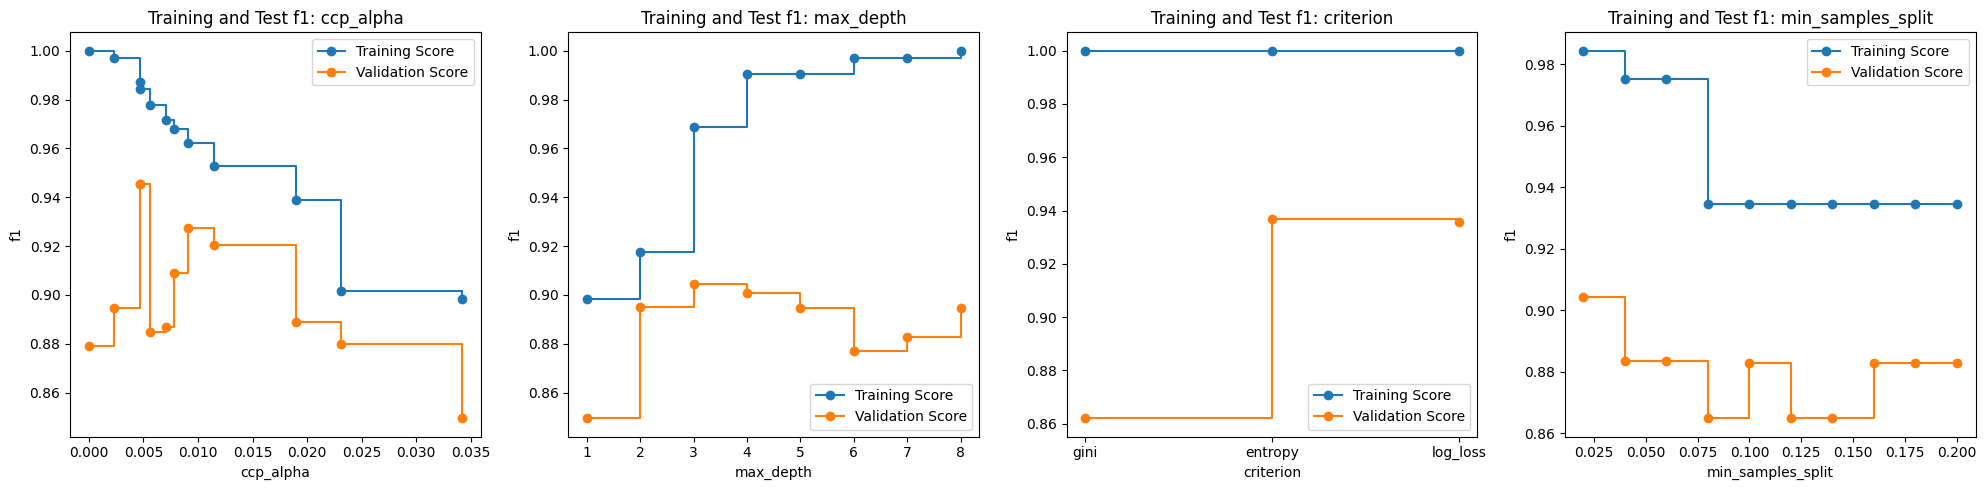

In [12]:
# Use a helper function 'plot_train_test_metrics' to visualize the training and test scores
# 'train_scores' and 'test_scores' contain the scores for each hyperparameter
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'scoring' parameter specifies the scoring metric used for evaluation (e.g., 'Accuracy')
helper.plot_train_test_metrics(train_scores_dct, test_scores_dct, param_values, param_names, scoring='f1')

### Tuning Model using GridSearch

In [13]:
# Use a helper function 'grid_search_func' to perform grid search over hyperparameters
# DecisionTreeClassifier() creates a Decision Tree classifier object
# 'param_values' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'cv=5' specifies 5-fold cross-validation for evaluation
# 'scoring='f1'' specifies that the 'f1' metric will be used for evaluation
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
result_dct = helper.grid_search_func(DecisionTreeClassifier(), 
                                     param_values, param_names,
                                     cv=5, scoring='f1', pos_label = "M",
                                     X_train=X_train, X_test=X_test,y_train=y_train, y_test=y_test, 
                                     verbose= 2 )


Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


Best parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 0.02}
Test accuracy: 0.9444444444444444


In [14]:
df_dct = pd.DataFrame(result_dct[1])

0 0
DecisionTreeClassifier time: 0.0045 seconds
2 1
DecisionTreeClassifier time: 0.0050 seconds
4 2
DecisionTreeClassifier time: 0.0076 seconds


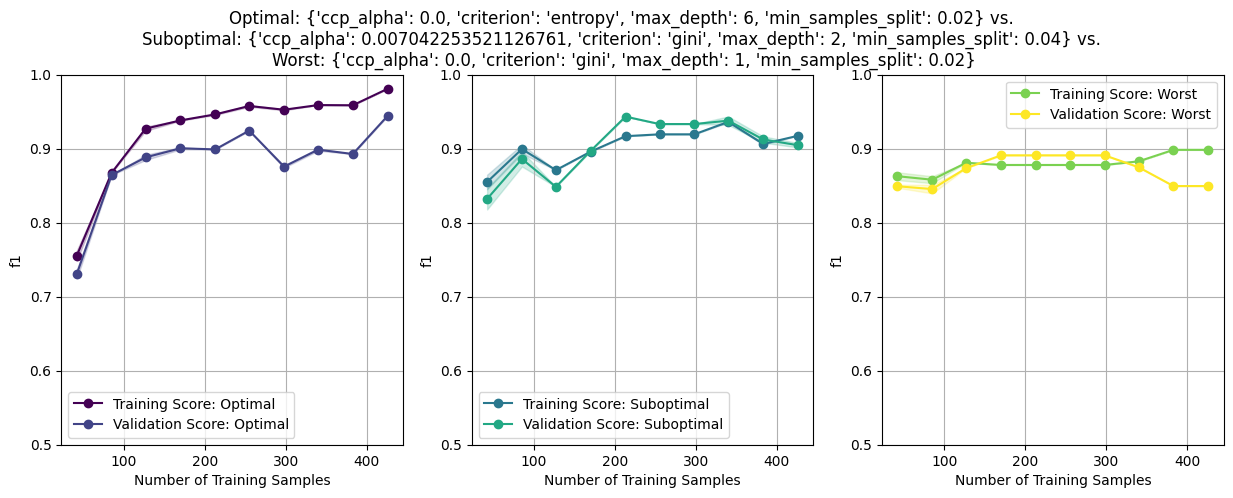

In [15]:
# Get best, worst and suboptimal hyperparameter values
best_params = df_dct.sort_values(by="rank_test_score").iloc[0].params
worst_params = df_dct.sort_values(by="rank_test_score").iloc[-1].params
suboptimal_params = df_dct.sort_values(by="rank_test_score").iloc[int(len(df_dct) / 2)].params

# Use a helper function 'plot_learning_curves' to visualize learning curves wrt sample size
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
# 'clfs' is a list containing classifiers with different hyperparameters
# 'names' is a list containing names for classifier and parameters (for plotting)
# 'plot_train=False' specifies not to plot the training curves
# 'cv=10' specifies 10-fold cross-validation for evaluation
result = helper.plot_learning_curves(X_train, X_test, y_train, y_test, 
                     clfs=[DecisionTreeClassifier(**best_params),
                           DecisionTreeClassifier(**suboptimal_params),
                           DecisionTreeClassifier(**worst_params),],
                     names=[f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}", f"Worst: {worst_params}"],
                     plot_train=True,
                     cv=10, 
                     scoring = "f1",
                     pos_label = "M")

In [17]:
(predict_times, fit_times, train_scores, test_scores) = result

In [19]:
fit_times

[[0.0005202293395996094,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0010042190551757812,
  0.000997304916381836],
 [0.0016613006591796875,
  0.0010864734649658203,
  0.001003265380859375,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0010187625885009766,
  0.00099945068359375,
  0.0],
 [0.0005116462707519531,
  0.0011403560638427734,
  0.0010156631469726562,
  0.0005133152008056641,
  0.0,
  0.0,
  0.0,
  0.0005412101745605469,
  0.0009899139404296875,
  0.0010089874267578125],
 [0.0010178089141845703,
  0.0010099411010742188,
  0.0009999275207519531,
  0.0005383491516113281,
  0.001001596450805664,
  0.0009989738464355469,
  0.000518798828125,
  0.0,
  0.0,
  0.0],
 [0.0005123615264892578,
  0.0009984970092773438,
  0.0,
  0.0010004043579101562,
  0.0010001659393310547,
  0.0,
  0.0009007453918457031,
  0.0,
  0.0,
  0.001003265380859375],
 [0.0009946823120117188,
  0.0015141963958740234,
  0.0,
  0.00099945068359375,
  0.0015337467193603516,
  0.0,
  0.0009996891021728516,
  0.0011088848

## Neural Networks (NN)

- Validation curves for at least two hyperparameters
 - Hidden Layer Size is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - X axis should be iterations or epoch - ie loss curve
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [14]:
from sklearn.neural_network import MLPClassifier

### Hyperparameter tuning


In a neural network classifier, there are several hyperparameters that can significantly impact the performance and behavior of the model. However, two of the most important hyperparameters are typically:

- Number of Hidden Layers and Neurons: The architecture of the neural network, including the number of hidden layers and the number of neurons in each layer, is crucial. A deeper network with more layers can capture complex relationships in the data, but it also increases the risk of overfitting, especially with limited data. Conversely, a shallow network may not have enough capacity to learn intricate patterns in the data. The number of neurons in each layer also affects the model's capacity to learn and its computational complexity.

- Learning Rate: The learning rate determines the step size at which the model parameters are updated during training. It controls the rate of convergence during training and influences how quickly or slowly the model learns. A high learning rate may cause the model to overshoot the optimal solution, leading to instability or divergence, while a low learning rate may result in slow convergence or getting stuck in local minima. Finding an appropriate learning rate is crucial for training neural networks effectively.

While these two hyperparameters are often considered among the most important, other factors such as activation functions, regularization techniques, batch size, and optimization algorithms also play significant roles in determining the performance of a neural network classifier. Experimentation and tuning across these parameters are typically necessary to achieve the best performance for a specific task.

In [24]:
# Number of Hidden Layers and Neurons
param_name = "hidden_layer_sizes"

# List of values to be explored for the hyperparameter
param_values = [[20 for _ in range(i)] for i in range(2, 13)]

# Use a helper function 'train_clfs_with_hyperparameters' to train classifiers with different hyperparameter values
# MLPClassifier is the classifier being used

# Keep number of neurons fixed (20) and change the number of hidden layers from 2 -> 12
nn_clfs_layers = helper.train_clfs_with_hyperparameters(MLPClassifier, param_name, param_values, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# Varying the Activation function used by the neurons

# Define the hyperparameter name
param_name = "activation"

# List of values to be explored for the hyperparameter
param_values = ['identity', 'logistic', 'tanh', 'relu']

nn_clfs_activation = helper.train_clfs_with_hyperparameters(MLPClassifier, param_name, param_values, X_train, y_train) # Add kwars with max_iter to this fucntion

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

In [26]:
# Calculate training scores for classifiers trained with different hidden layers
scoring = "f1"
train_scores_layers = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                     clf.predict(X_train), scoring, pos_label = 'M') for clf in nn_clfs_layers]

# Calculate test scores for classifiers trained with different hidden layers
test_scores_layers = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                    clf.predict(X_test), scoring, pos_label = 'M') for clf in nn_clfs_layers]

# Calculate training scores for classifiers trained with different activation functions
train_scores_activation = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                       clf.predict(X_train), scoring, pos_label = 'M') for clf in nn_clfs_activation]

# Calculate test scores for classifiers trained with different activation functions
test_scores_activation = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                      clf.predict(X_test), scoring, pos_label = 'M') for clf in nn_clfs_activation]

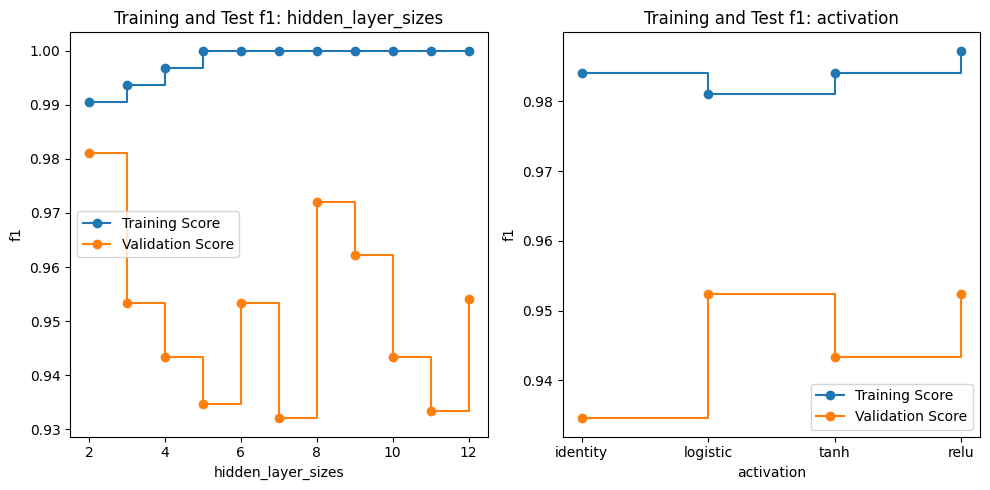

In [27]:
# Combine training scores for classifiers with different hyperparameter values
train_scores = [train_scores_layers, train_scores_activation]

# Combine test scores for classifiers with different hyperparameter values
test_scores = [test_scores_layers, test_scores_activation]

# Define the names of the hyperparameters being tuned
param_names = ["hidden_layer_sizes", "activation"]

# Define the range of hyperparameter values being explored
params = [range(2, 13),
          ['identity', 'logistic', 'tanh', 'relu']]

# Use a helper function 'plot_train_test_metrics' to visualize the training and test scores
# 'train_scores' and 'test_scores' contain the scores for each hyperparameter
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'scoring' parameter specifies the scoring metric used for evaluation (e.g., 'Accuracy')
helper.plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring='f1')

### Tuning Model using GridSearch

In [30]:
# Define the names of the hyperparameters being tuned
param_names = ["hidden_layer_sizes", "activation"]

# Define the range of hyperparameter values being explored
params = [range(2, 13),
          ['identity', 'logistic', 'tanh', 'relu']]

# Use a helper function 'grid_search_func' to perform grid search over hyperparameters
best_params = helper.grid_search_func(MLPClassifier(solver="adam", max_iter = 1000), params, param_names,
                     cv=5, scoring='f1', pos_label = "M",
                     X_train=X_train, X_test=X_test,
                     y_train=y_train, y_test=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': 3}
Test accuracy: 0.965034965034965


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

MLPClassifier time: 61.2989 seconds
MLPClassifier time: 28.4525 seconds


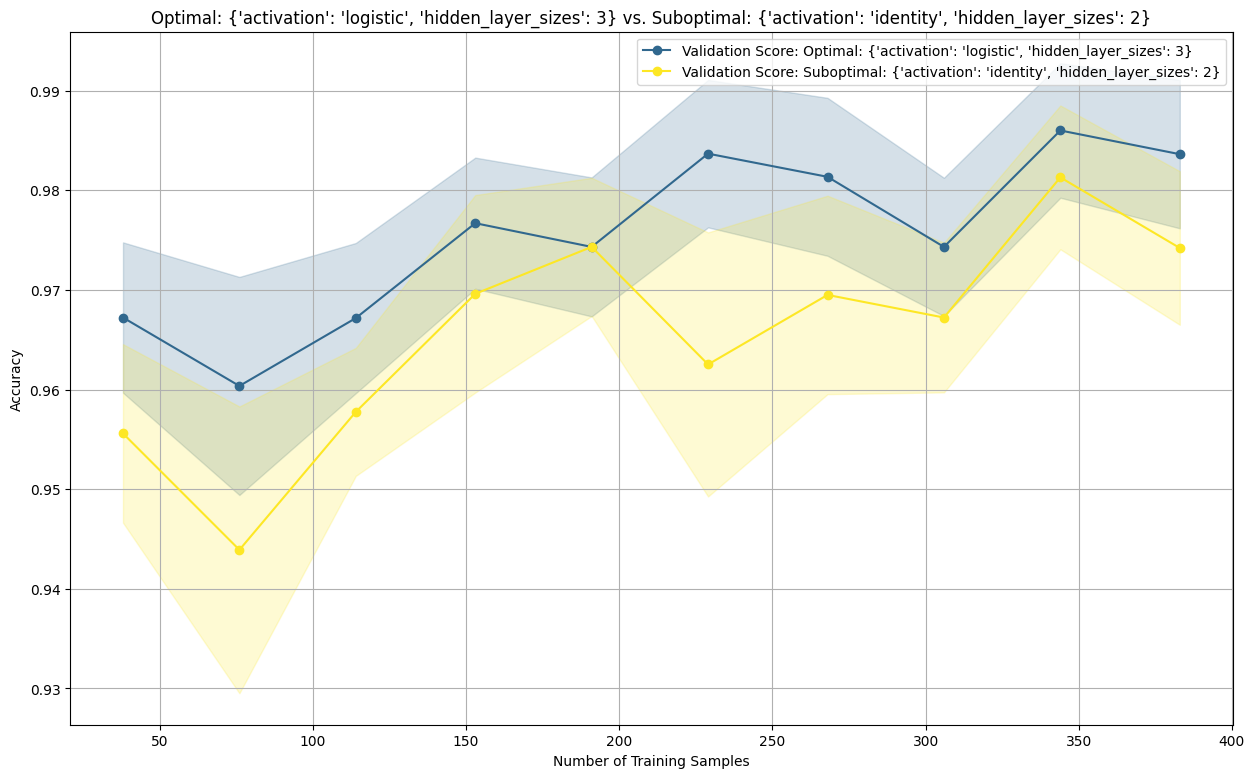

In [31]:
# Define suboptimal hyperparameter values
suboptimal_params = {'activation': 'identity', 'hidden_layer_sizes': 2}

# Use a helper function 'plot_learning_curves' to visualize learning curves
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
# 'clfs' is a list containing classifiers with different hyperparameters
# 'names' is a list containing names for classifier and parameters (for plotting)
# 'plot_train=False' specifies not to plot the training curves
# 'cv=10' specifies 10-fold cross-validation for evaluation
helper.plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs=[MLPClassifier(**best_params, solver="adam", max_iter = 1000),
                           MLPClassifier(**suboptimal_params, solver="adam", max_iter = 1000)],
                     names=[f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train=False,
                     cv=10)

## KNN Classifier

- Validation curves for at least two hyperparameters
 - K is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [32]:
from sklearn.neighbors import KNeighborsClassifier

### Hyperparameter tuning


In a k-Nearest Neighbors (kNN) classifier, the two most important parameters are:

- Number of Neighbors (k): The choice of the number of neighbors, represented by the parameter 'k', is critical in kNN. It determines how many nearest neighbors to consider when making predictions for a new data point. Selecting an appropriate value for 'k' is essential because a small 'k' value may result in a noisy decision boundary, leading to overfitting, while a large 'k' value may cause the model to be overly biased and ignore local patterns in the data.

- Distance Metric: The choice of distance metric is also crucial in kNN, as it determines how the distance between data points is measured. The most commonly used distance metrics are Euclidean distance and Manhattan distance, but other options like Minkowski distance and cosine similarity may also be suitable depending on the nature of the data. Selecting the appropriate distance metric is essential for accurately capturing the similarity between data points and ensuring the effectiveness of the kNN algorithm.

These two parameters, the number of neighbors ('k') and the distance metric, significantly impact the performance of a kNN classifier. It's important to experiment with different values for these parameters and potentially perform hyperparameter tuning to find the optimal combination for a given dataset and classification task.

In [37]:
# Number of number of neighborss
param_name = "n_neighbors"

# List of values to be explored for the hyperparameter
param_values = list(range(2, 30, 2))
# Use a helper function 'train_clfs_with_hyperparameters' to train classifiers with different hyperparameter values
# KNeighborsClassifier is the classifier being used

# Keep number of neurons fixed (20) and change the number of hidden layers from 2 -> 12
knn_clfs_neighbors = helper.train_clfs_with_hyperparameters(KNeighborsClassifier, param_name, param_values, X_train, y_train)

In [38]:
# Varying the distance metric

# Define the hyperparameter name
param_name = "metric"

# List of values to be explored for the hyperparameter
param_values = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']

# Keep number of neurons fixed (20) and change the number of hidden layers from 2 -> 12
knn_clfs_metric = helper.train_clfs_with_hyperparameters(KNeighborsClassifier, param_name, param_values, X_train, y_train)

### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

In [39]:
# Calculate training scores for classifiers trained with different hidden layers
scoring = "f1"
train_scores_neighbors = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                     clf.predict(X_train), scoring, pos_label = 'M') for clf in knn_clfs_neighbors]

# Calculate test scores for classifiers trained with different hidden layers
test_scores_neighbors = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                    clf.predict(X_test), scoring, pos_label = 'M') for clf in knn_clfs_neighbors]

# Calculate training scores for classifiers trained with different activation functions
train_scores_metric = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                       clf.predict(X_train), scoring, pos_label = 'M') for clf in knn_clfs_metric]

# Calculate test scores for classifiers trained with different activation functions
test_scores_metric = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                      clf.predict(X_test), scoring, pos_label = 'M') for clf in knn_clfs_metric]

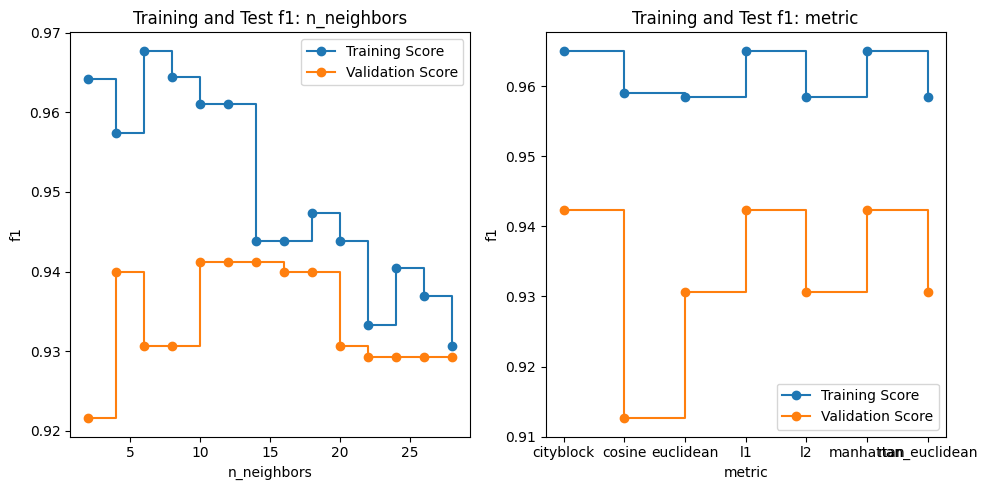

In [41]:
# Combine training scores for classifiers with different hyperparameter values
train_scores = [train_scores_neighbors, train_scores_metric]

# Combine test scores for classifiers with different hyperparameter values
test_scores = [test_scores_neighbors, test_scores_metric]

# Define the names of the hyperparameters being tuned
param_names = ["n_neighbors", "metric"]

# Define the range of hyperparameter values being explored
params = [list(range(2, 30, 2)),
          ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']]

# Use a helper function 'plot_train_test_metrics' to visualize the training and test scores
# 'train_scores' and 'test_scores' contain the scores for each hyperparameter
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'scoring' parameter specifies the scoring metric used for evaluation (e.g., 'Accuracy')
helper.plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring='f1')

In [42]:
# Use a helper function 'grid_search_func' to perform grid search over hyperparameters
best_params = helper.grid_search_func(KNeighborsClassifier(), params, param_names,
                     cv=5, scoring='f1', pos_label = "M",
                     X_train=X_train, X_test=X_test,
                     y_train=y_train, y_test=y_test)

Best parameters: {'metric': 'cosine', 'n_neighbors': 18}
Test accuracy: 0.9300699300699301


KNeighborsClassifier time: 5.8017 seconds
KNeighborsClassifier time: 2.6734 seconds


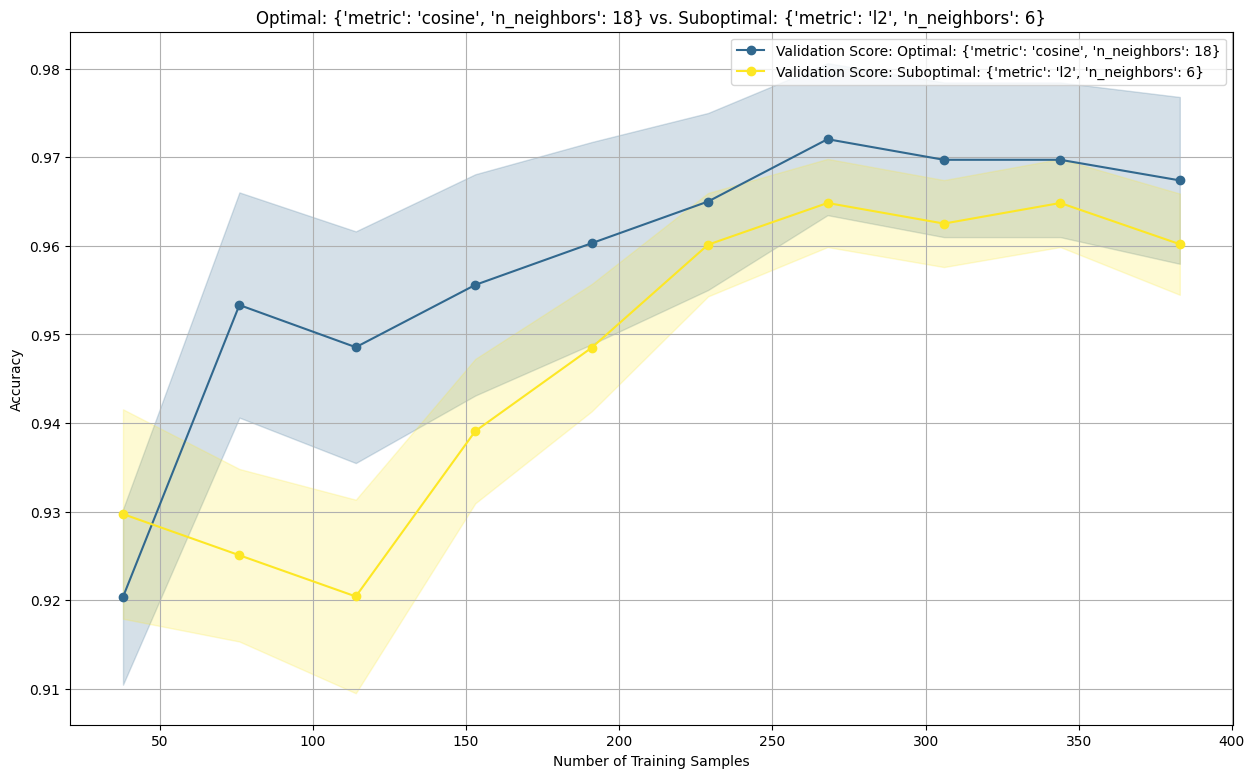

In [43]:
# Define suboptimal hyperparameter values
suboptimal_params = {'metric': 'l2', 'n_neighbors': 6}

# Use a helper function 'plot_learning_curves' to visualize learning curves
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
# 'clfs' is a list containing classifiers with different hyperparameters
# 'names' is a list containing names for classifier and parameters (for plotting)
# 'plot_train=False' specifies not to plot the training curves
# 'cv=10' specifies 10-fold cross-validation for evaluation
helper.plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs=[KNeighborsClassifier(**best_params),
                           KNeighborsClassifier(**suboptimal_params)],
                     names=[f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train=False,
                     cv=10)

## Support Vector Machines

- Validation curves for at least two hyperparameters
 - Kernel Type is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [44]:
from sklearn.svm import SVC

### Hyperparameter Tuning


In support vector classifiers (SVC), two of the most important hyperparameters are:

- C: This hyperparameter controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a larger margin but may misclassify some training points, while a larger value of C allows for fewer misclassifications but may result in a smaller margin. Tuning C is crucial for controlling the balance between bias and variance in the model.

- Kernel choice and its parameters: SVC can use different types of kernels (e.g., linear, polynomial, radial basis function (RBF), sigmoid) to transform the input space into a higher-dimensional feature space where the data might be more separable. The choice of kernel and its associated parameters (e.g., degree for polynomial kernel, gamma for RBF kernel) significantly affect the model's performance. For example, the RBF kernel's gamma parameter controls the influence of individual training samples, while the polynomial kernel's degree parameter determines the degree of the polynomial used in the transformation.

Optimizing these hyperparameters through techniques like grid search or randomized search is essential to achieve the best performance of an SVC model for a given dataset.

In [46]:
# Number of number of neighbors #

# Define the hyperparameter name
param_name = "C"

# List of values to be explored for the hyperparameter
param_values = [item for sublist in  [[0.01 * 10 ** i, 0.05 * 10 ** i ] for i in range(6)] for item in sublist]
# Use a helper function 'train_clfs_with_hyperparameters' to train classifiers with different hyperparameter values
# KNeighborsClassifier is the classifier being used

# Keep number of neurons fixed (20) and change the number of hidden layers from 2 -> 12
svc_clfs_c = helper.train_clfs_with_hyperparameters(SVC, param_name, param_values, X_train, y_train)

# Varying the distance metric #

# Define the hyperparameter name
param_name = "kernel"

# List of values to be explored for the hyperparameter
param_values = ['linear', 'poly', 'sigmoid', 'rbf']

# Keep number of neurons fixed (20) and change the number of hidden layers from 2 -> 12
svc_clfs_kernel = helper.train_clfs_with_hyperparameters(SVC, param_name, param_values, X_train, y_train)

### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

In [47]:
# Calculate training scores for classifiers trained with different hidden layers
scoring = "f1"
train_scores_c = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                     clf.predict(X_train), scoring, pos_label = 'M') for clf in svc_clfs_c]

# Calculate test scores for classifiers trained with different hidden layers
test_scores_c = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                    clf.predict(X_test), scoring, pos_label = 'M') for clf in svc_clfs_c]

# Calculate training scores for classifiers trained with different activation functions
train_scores_kernel = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                       clf.predict(X_train), scoring, pos_label = 'M') for clf in svc_clfs_kernel]

# Calculate test scores for classifiers trained with different activation functions
test_scores_kernel = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                      clf.predict(X_test), scoring, pos_label = 'M') for clf in svc_clfs_kernel]

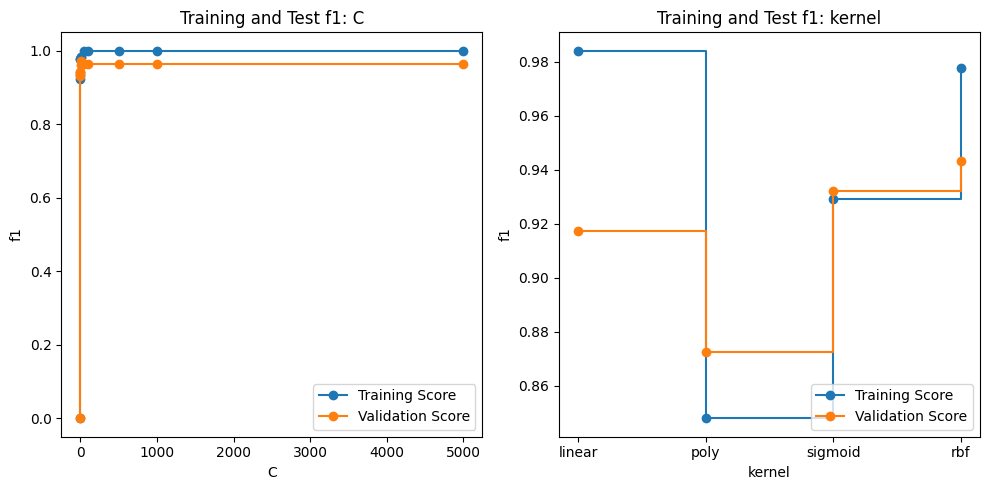

In [53]:
import numpy as np
# Combine training scores for classifiers with different hyperparameter values
train_scores = [train_scores_c, train_scores_kernel]

# Combine test scores for classifiers with different hyperparameter values
test_scores = [test_scores_c, test_scores_kernel]

# Define the names of the hyperparameters being tuned
param_names = ["C", "kernel"]

# Define the range of hyperparameter values being explored
params = [[item for sublist in  [[0.01 * 10 ** i, 0.05 * 10 ** i ] for i in range(6)] for item in sublist],
          ['linear', 'poly', 'sigmoid', 'rbf']]

# Use a helper function 'plot_train_test_metrics' to visualize the training and test scores
# 'train_scores' and 'test_scores' contain the scores for each hyperparameter
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'scoring' parameter specifies the scoring metric used for evaluation (e.g., 'Accuracy')
helper.plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring='f1')

In [54]:
# Use a helper function 'grid_search_func' to perform grid search over hyperparameters
best_params = helper.grid_search_func(SVC(), params, param_names,
                     cv=5, scoring='f1', pos_label = "M",
                     X_train=X_train, X_test=X_test,
                     y_train=y_train, y_test=y_test)

Best parameters: {'C': 1.0, 'kernel': 'linear'}
Test accuracy: 0.9370629370629371


SVC time: 0.8706 seconds
SVC time: 1.5069 seconds


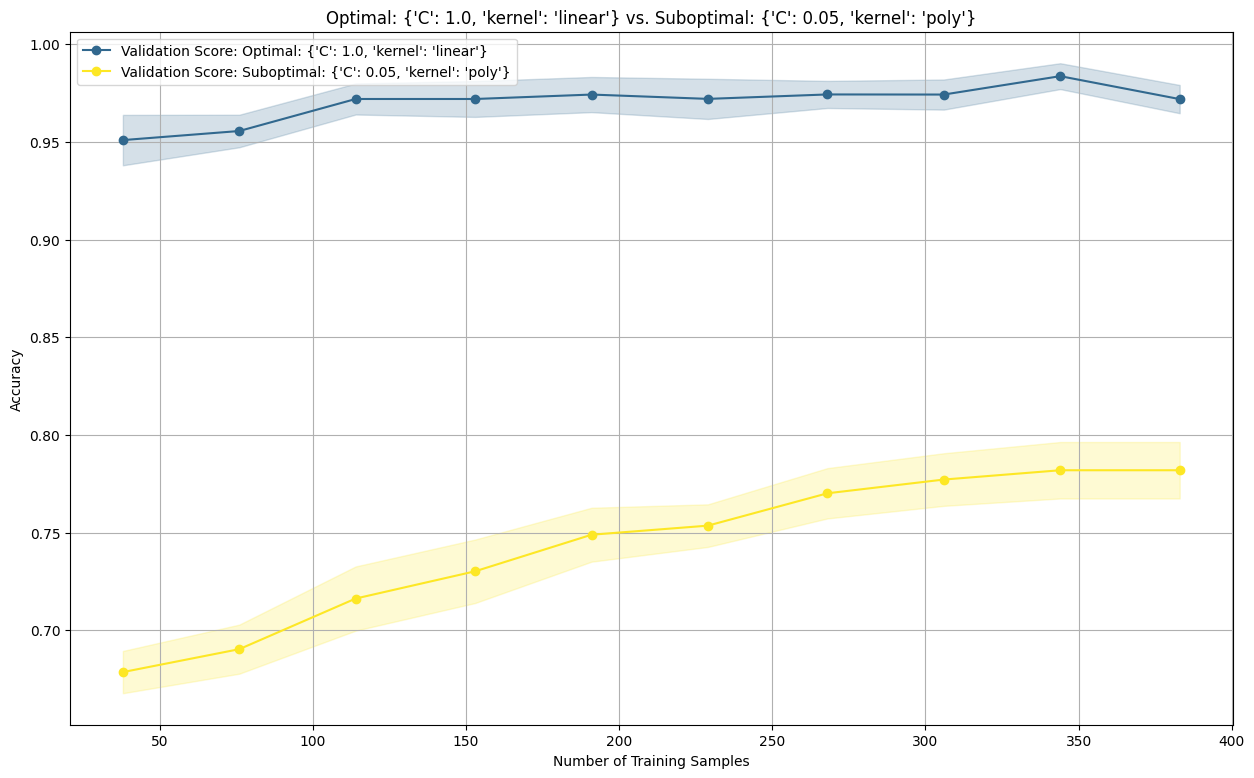

In [55]:
# Define suboptimal hyperparameter values
suboptimal_params = {'C': 0.05, 'kernel': 'poly'}

# Use a helper function 'plot_learning_curves' to visualize learning curves
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
# 'clfs' is a list containing classifiers with different hyperparameters
# 'names' is a list containing names for classifier and parameters (for plotting)
# 'plot_train=False' specifies not to plot the training curves
# 'cv=10' specifies 10-fold cross-validation for evaluation
helper.plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs=[SVC(**best_params),
                           SVC(**suboptimal_params)],
                     names=[f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train=False,
                     cv=10)

## Boosting

- Validation curves for at least two hyperparameters
 - \# of Weak Learners is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
- Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

### Hyperparamter tuning


In gradient boosting, there are several hyperparameters that play crucial roles in the performance and behavior of the model. Some of the most important hyperparameters include:

- n_estimators: This parameter defines the number of boosting stages (weak learners, typically decision trees) to be used in the ensemble. Increasing the number of estimators generally improves the model's performance, but it also increases computational complexity and the risk of overfitting.

- learning_rate: Also known as the shrinkage parameter (or eta), the learning rate controls the contribution of each tree to the final ensemble. Lower values require more boosting iterations but can improve generalization and robustness to overfitting.

- max_depth: This parameter determines the maximum depth of each individual decision tree in the ensemble. Deeper trees can capture more complex relationships in the data but may also lead to overfitting. Limiting the max_depth can help control the complexity of the model and improve generalization.

These are some of the key hyperparameters in gradient boosting, but there may be additional parameters depending on the specific implementation or variant of the algorithm. Tuning these hyperparameters through techniques like grid search or randomized search is essential for optimizing the model's performance on a given dataset.

In [65]:
# Number of weak learners #
param_name = "n_estimators"
param_values = [item for sublist in  [[1 * 10 ** i, 5 * 10 ** i] for i in range(4)] for item in sublist]
gbc_clfs_n = helper.train_clfs_with_hyperparameters(GradientBoostingClassifier, param_name, param_values, X_train, y_train)

# Learning rate #
param_name = "learning_rate"
param_values = [item for sublist in  [[0.005 * 10 ** i, 0.01 * 10 ** i] for i in range(3)] for item in sublist]
gbc_clfs_lr = helper.train_clfs_with_hyperparameters(GradientBoostingClassifier, param_name, param_values, X_train, y_train)

# Max depth of the estimators #
param_name =  "max_depth"
param_values = list(range(1, 13))
gbc_clfs_depth = helper.train_clfs_with_hyperparameters(GradientBoostingClassifier, param_name, param_values, X_train, y_train)

### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

In [66]:
# Calculate training scores for classifiers trained with different hidden layers
scoring = "f1"
train_scores_n = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                     clf.predict(X_train), scoring, pos_label = 'M') for clf in gbc_clfs_n]

# Calculate test scores for classifiers trained with different hidden layers
test_scores_n = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                    clf.predict(X_test), scoring, pos_label = 'M') for clf in gbc_clfs_n]

# Calculate training scores for classifiers trained with different activation functions
train_scores_lr = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                       clf.predict(X_train), scoring, pos_label = 'M') for clf in gbc_clfs_lr]

# Calculate test scores for classifiers trained with different activation functions
test_scores_lr = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                      clf.predict(X_test), scoring, pos_label = 'M') for clf in gbc_clfs_lr]

# Calculate training scores for classifiers trained with different activation functions
train_scores_depth = [helper.get_score(y_train.reset_index().drop("index", axis = 1).diagnosis.values,
                                       clf.predict(X_train), scoring, pos_label = 'M') for clf in gbc_clfs_depth]

# Calculate test scores for classifiers trained with different activation functions
test_scores_depth = [helper.get_score(y_test.reset_index().drop("index", axis = 1).diagnosis.values,
                                      clf.predict(X_test), scoring, pos_label = 'M') for clf in gbc_clfs_depth]



ValueError: x and y must have same first dimension, but have shapes (5,) and (12,)

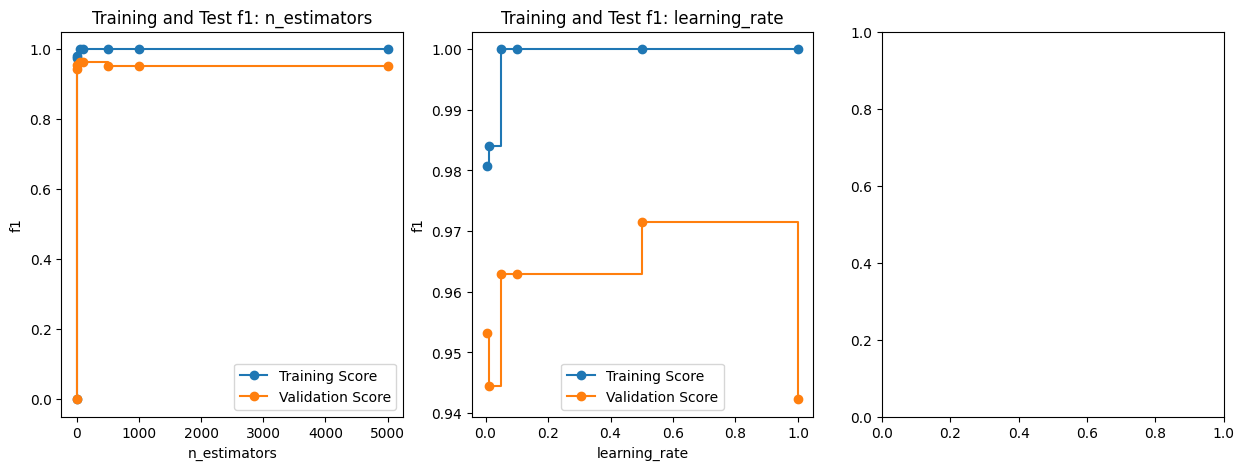

In [71]:
import numpy as np
# Combine training scores for classifiers with different hyperparameter values
train_scores = [train_scores_n, train_scores_lr, train_scores_depth]

# Combine test scores for classifiers with different hyperparameter values
test_scores = [test_scores_n, test_scores_lr, test_scores_depth]

# Define the names of the hyperparameters being tuned
param_names = ["n_estimators", "learning_rate", "max_depth"]

# Define the range of hyperparameter values being explored
params = [[item for sublist in  [[1 * 10 ** i, 5 * 10 ** i] for i in range(4)] for item in sublist],
          [item for sublist in  [[0.005 * 10 ** i, 0.01 * 10 ** i] for i in range(3)] for item in sublist],
          list(range(1, 13))]

# Use a helper function 'plot_train_test_metrics' to visualize the training and test scores
# 'train_scores' and 'test_scores' contain the scores for each hyperparameter
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'scoring' parameter specifies the scoring metric used for evaluation (e.g., 'Accuracy')
helper.plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring='f1')

In [74]:
# Define the names of the hyperparameters being tuned
param_names = ["n_estimators", "learning_rate", "max_depth"]

# Define the range of hyperparameter values being explored
params = [[item for sublist in  [[1 * 10 ** i, 5 * 10 ** i] for i in range(2)] for item in sublist],
          [item for sublist in  [[0.005 * 10 ** i, 0.01 * 10 ** i] for i in range(3)] for item in sublist],
          list(range(1, 6))]
# Use a helper function 'grid_search_func' to perform grid search over hyperparameters
best_params = helper.grid_search_func(GradientBoostingClassifier(), params, param_names,
                     cv=5, scoring='f1', pos_label = "M",
                     X_train=X_train, X_test=X_test,
                     y_train=y_train, y_test=y_test,
                                      verbose = 2)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ...learning_rate=0.005, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ..learning_rate=0.005, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ..learning_rate=0.005, max_depth=1, n

GradientBoostingClassifier time: 6.8538 seconds
GradientBoostingClassifier time: 2.1513 seconds


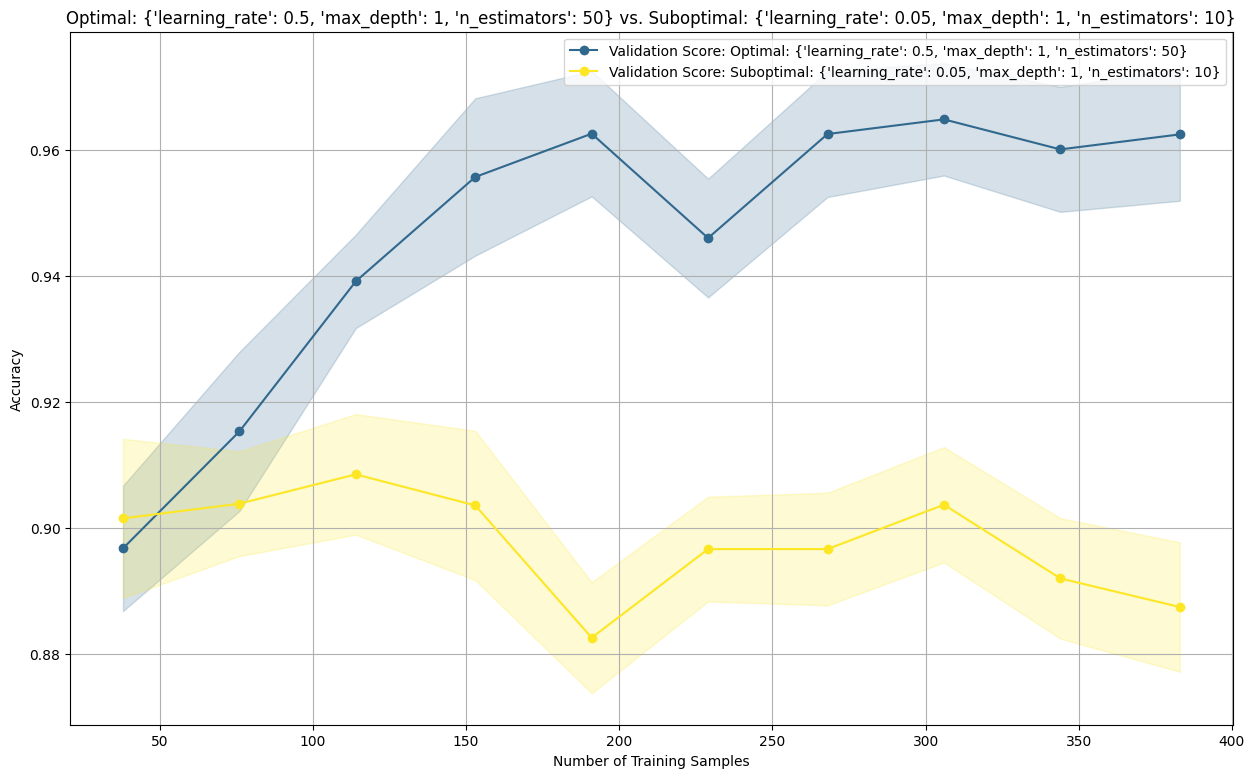

In [76]:
# Define suboptimal hyperparameter values
suboptimal_params = {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 10}

# Use a helper function 'plot_learning_curves' to visualize learning curves
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
# 'clfs' is a list containing classifiers with different hyperparameters
# 'names' is a list containing names for classifier and parameters (for plotting)
# 'plot_train=False' specifies not to plot the training curves
# 'cv=10' specifies 10-fold cross-validation for evaluation
helper.plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs=[GradientBoostingClassifier(**best_params),
                           GradientBoostingClassifier(**suboptimal_params)],
                     names=[f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train=False,
                     cv=10)